# Top 5 Leagues - Data Exploration

In [414]:
# pip install adjustText
# %pip install highlight_text
# %pip install mplsoccer

In [415]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from highlight_text import fig_text
import matplotlib.patches as patches
import mplsoccer

%matplotlib inline 

In [416]:
# Setting basic color palette
background = "#171717"
font_color = 'white'
pd.options.display.max_columns = 50

In [417]:
# Importing data
df_gsc = pd.read_csv("../../Data/Men's Football Data/All 5 Leagues/Goal_Shot_Creation_20_21.csv", 
                     index_col='Rk')
df_sh = pd.read_csv("../../Data/Men's Football Data/All 5 Leagues/Shooting_20_21.csv", index_col='Rk')
df_pos = pd.read_csv("../../Data/Men's Football Data/Player Positions-FBRef format.csv",
                    index_col='S. No.')

### Merging two dataframes

In [418]:
df = pd.merge(df_sh, df_gsc, on='Player', how='outer')
df.sample()

,Player,Nation_x,Pos_x,Squad_x,Comp_x,Age_x,Born_x,90s_x,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Nation_y,Pos_y,Squad_y,Comp_y,Age_y,Born_y,90s_y,SCA,SCA90,SCAPassLive,SCAPassDead,SCADrib,SCASh,SCAFld,SCADef,GCA,GCA90,GCAPassLive,GCAPassDead,GCADrib,GCASh,GCAFld,GCADef
2750,Damián Suárez\Damian-Suarez,uy URU,DF,Getafe,es La Liga,32,1988,27.0,0.04,0.37,0.07,20.0,0.37,0.07,0.1,0.5,32.1,0.07,0.0,0.0,0.01,0.01,0.03,0.03,0.03,uy URU,DF,Getafe,es La Liga,32,1988,27.0,1.33,1.33,0.78,0.3,0.04,0.04,0.15,0.04,0.07,0.07,0.04,0.0,0.04,0.0,0.0,0.0


In [419]:
df['Player'] = df['Player'].apply(lambda x: x.split('\\')[0])

In [420]:
df_pos.rename(columns={"Name": "Player"}, inplace=True)
df_pos

,Player,Position
S. No.,,
1,Ismael Aaneba,Right-Back
2,Patrick van Aanholt,Left-Back
3,Issah Abbas,Centre-Forward
4,Yunis Abdelhamid,Centre-Back
5,Sabit Abdulai,Central Midfield
...,...,...
2818,Steven Zuber,Left Midfield
2819,Martín Zubimendi,Defensive Midfield
2820,Martin Ødegaard,Attacking Midfield


In [421]:
df = pd.merge(df_pos, df, on='Player', how='outer')
df.head(5)

,Player,Position,Nation_x,Pos_x,Squad_x,Comp_x,Age_x,Born_x,90s_x,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Nation_y,Pos_y,Squad_y,Comp_y,Age_y,Born_y,90s_y,SCA,SCA90,SCAPassLive,SCAPassDead,SCADrib,SCASh,SCAFld,SCADef,GCA,GCA90,GCAPassLive,GCAPassDead,GCADrib,GCASh,GCAFld,GCADef
0,Ismael Aaneba,Right-Back,fr FRA,FWDF,Strasbourg,fr Ligue 1,21.0,1999.0,0.1,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,0.00,0.0,0.0,0.00,0.00,NaN,0.00,0.00,fr FRA,FWDF,Strasbourg,fr Ligue 1,21.0,1999.0,0.1,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
1,Patrick van Aanholt,Left-Back,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,19.7,0.00,0.91,0.30,33.3,0.91,0.30,0.0,0.0,20.3,0.15,0.0,0.0,0.06,0.06,0.07,-0.06,-0.06,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,19.7,1.32,1.32,1.12,0.15,0.05,0.00,0.0,0.0,0.15,0.15,0.1,0.05,0.0,0.0,0.0,0.0
2,Issah Abbas,Centre-Forward,gh GHA,DFFW,Mainz 05,de Bundesliga,21.0,1998.0,0.2,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,0.00,0.0,0.0,0.00,0.00,NaN,0.00,0.00,gh GHA,DFFW,Mainz 05,de Bundesliga,21.0,1998.0,0.2,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
3,Yunis Abdelhamid,Centre-Back,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,32.1,0.09,0.47,0.16,33.3,0.47,0.16,0.2,0.6,10.2,0.00,0.0,0.0,0.05,0.05,0.11,0.04,0.04,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,32.1,0.34,0.34,0.31,0.00,0.00,0.03,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
4,Sabit Abdulai,Central Midfield,gh GHA,MF,Getafe,es La Liga,21.0,1999.0,0.7,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,0.00,0.0,0.0,0.00,0.00,NaN,0.00,0.00,gh GHA,MF,Getafe,es La Liga,21.0,1999.0,0.7,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0


#### Dropping unused columns

In [422]:
df.drop([ 'Nation_y', 'Pos_y', 'Squad_y', 'Comp_y', 'Age_y', 'Born_y',
        '90s_y', 'Nation_x', 'Comp_x', 'Born_x', 'Pos_x'], inplace=True, axis=1)
df.sample(1)

,Player,Position,Squad_x,Age_x,90s_x,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,SCA,SCA90,SCAPassLive,SCAPassDead,SCADrib,SCASh,SCAFld,SCADef,GCA,GCA90,GCAPassLive,GCAPassDead,GCADrib,GCASh,GCAFld,GCADef
2936,Allan Saint-Maximin,Left Winger,Newcastle Utd,23.0,17.3,0.17,1.73,0.69,40.0,1.73,0.69,0.1,0.25,19.8,0.0,0.0,0.0,0.15,0.15,0.09,0.02,0.02,3.53,3.52,2.37,0.06,0.69,0.06,0.29,0.06,0.58,0.58,0.46,0.0,0.06,0.06,0.0,0.0


In [423]:
df.rename(columns={"Squad_x": "Squad",
                  'Age_x':'Age',
                  '90s_x': '90s'}, inplace=True)
df.head(3)

,Player,Position,Squad,Age,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,SCA,SCA90,SCAPassLive,SCAPassDead,SCADrib,SCASh,SCAFld,SCADef,GCA,GCA90,GCAPassLive,GCAPassDead,GCADrib,GCASh,GCAFld,GCADef
0,Ismael Aaneba,Right-Back,Strasbourg,21.0,0.1,0.0,0.00,0.0,NaN,0.00,0.0,NaN,NaN,NaN,0.00,0.0,0.0,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
1,Patrick van Aanholt,Left-Back,Crystal Palace,29.0,19.7,0.0,0.91,0.3,33.3,0.91,0.3,0.0,0.0,20.3,0.15,0.0,0.0,0.06,0.06,0.07,-0.06,-0.06,1.32,1.32,1.12,0.15,0.05,0.0,0.0,0.0,0.15,0.15,0.1,0.05,0.0,0.0,0.0,0.0
2,Issah Abbas,Centre-Forward,Mainz 05,21.0,0.2,0.0,0.00,0.0,NaN,0.00,0.0,NaN,NaN,NaN,0.00,0.0,0.0,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0


###### Updating missing values of two players as positions are missing 

In [424]:
df['Position'][df['Player'] == 'Silas Katompa'] = 'Right Midfield'
df['Position'][df['Player'] == 'Junior Dina Ebimbe'] = 'Central Midfield'
df.tail(2)

<ipython-input-424-e5c41f9c0b7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'][df['Player'] == 'Silas Katompa'] = 'Right Midfield'
<ipython-input-424-e5c41f9c0b7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'][df['Player'] == 'Junior Dina Ebimbe'] = 'Central Midfield'


,Player,Position,Squad,Age,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,SCA,SCA90,SCAPassLive,SCAPassDead,SCADrib,SCASh,SCAFld,SCADef,GCA,GCA90,GCAPassLive,GCAPassDead,GCADrib,GCASh,GCAFld,GCADef
3590,Junior Dina Ebimbe,Central Midfield,Dijon,19.0,23.8,0.04,1.93,0.55,28.3,1.93,0.55,0.02,0.08,17.0,0.0,0.00,0.00,0.16,0.16,0.08,-0.12,-0.12,2.56,2.56,1.72,0.04,0.42,0.21,0.17,0.00,0.13,0.13,0.08,0.0,0.00,0.04,0.0,0.00
3591,Silas Katompa,Right Midfield,Stuttgart,21.0,21.3,0.52,1.88,0.70,37.5,1.88,0.70,0.20,0.53,15.9,0.0,0.14,0.14,0.34,0.24,0.13,0.17,0.14,2.86,2.86,1.92,0.00,0.28,0.33,0.14,0.19,0.47,0.47,0.28,0.0,0.05,0.05,0.0,0.09


In [425]:
df.fillna(0, inplace=True)

In [426]:
df_m = df[df['Position'].apply(lambda x: 'Central Midfield' in x)]

In [427]:
df_m = df_m[df_m['90s']>=10]
df_m.drop_duplicates()
df_m.columns

Index(['Player', 'Position', 'Squad', 'Age', '90s', 'Gls', 'Sh', 'SoT', 'SoT%',
       'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG',
       'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'SCA', 'SCA90', 'SCAPassLive',
       'SCAPassDead', 'SCADrib', 'SCASh', 'SCAFld', 'SCADef', 'GCA', 'GCA90',
       'GCAPassLive', 'GCAPassDead', 'GCADrib', 'GCASh', 'GCAFld', 'GCADef'],
      dtype='object')

In [428]:
df['Position'].unique()

array(['Right-Back', 'Left-Back', 'Centre-Forward', 'Centre-Back',
       'Central Midfield', 'Defensive Midfield', 'Right Winger',
       'Attacking Midfield', 'Goalkeeper', 'Left Winger',
       'Right Midfield', 'Left Midfield', 'Second Striker', 'attack',
       'midfield', 'Defender'], dtype=object)

In [429]:
df_rb = df[df['Position'].apply(lambda x: 'Right-Back' in x)]
df_rb = df_rb[df_rb['90s'] > 10]
df_rb.drop_duplicates(subset=['Player'], inplace=True)

In [469]:
cutoff_pass = df_rb['SCAPassLive'].quantile(0.95)
cutoff_drib = df_rb['SCADrib'].quantile(0.95)
cutoff_both = (df_rb['SCAPassLive'] + df_rb['SCADrib']).quantile(0.95)

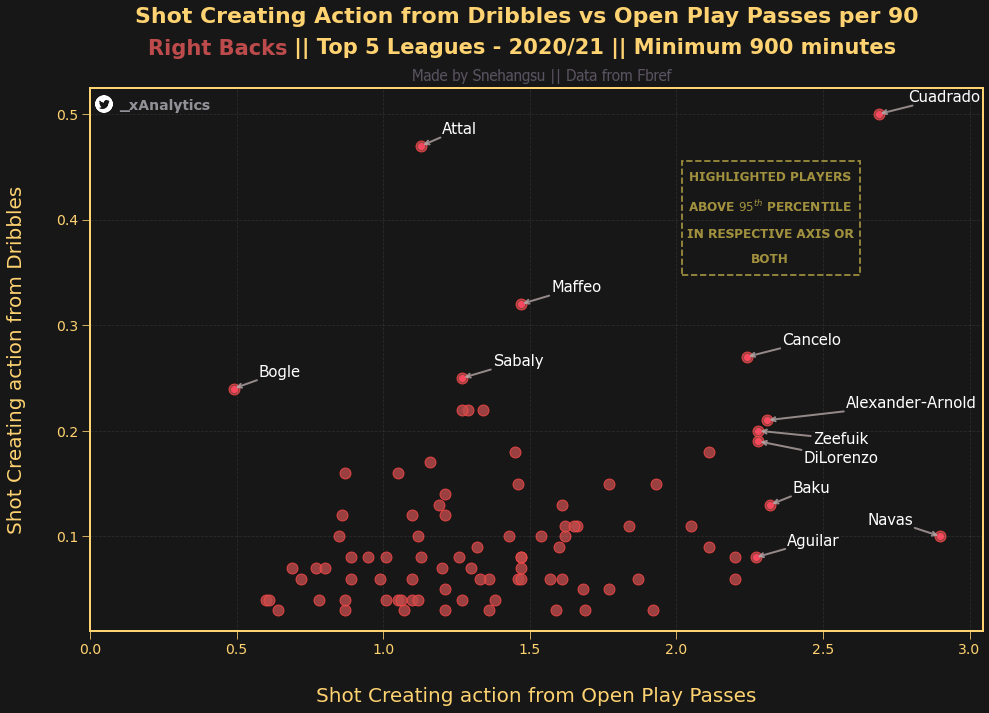

In [471]:
fig, ax = plt.subplots(figsize=(16,10))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)
ax.grid(ls='--', alpha=0.09, c='white')

x = (df_rb['SCAPassLive'])
y = (df_rb['SCADrib'])
ax.scatter(x, y, c='#BD4B4B', alpha=0.8, edgecolor='#FF4848', s=120)
ax.set_ylim(bottom=0.01)
ax.set_xlim(left=0)
ax.set_xlabel('Shot Creating action from Open Play Passes', color='#FFD371', fontname='Helvetica', 
              size=20, labelpad=30.0, weight='book')
ax.set_ylabel('Shot Creating action from Dribbles', color='#FFD371', fontname='Helvetica', size=20,
             labelpad=30.0, weight='book')

for axis in ['left', 'bottom', 'right', 'top']:
    ax.spines[axis].set_color('#FFD371')
    ax.spines[axis].set_linewidth(2)

ax.tick_params(axis='both', colors='#FFD371', size=8, labelsize=14)


texts = []
for x, y, minutes, name in zip(df_rb['SCAPassLive'], df_rb['SCADrib'], df_rb['90s'], df_rb['Player']):
    # Splitting the names to only get the last name of any kind of names
    if len(name.split()) == 1:
        name = name
#         print(name)
    else:
        name = "".join(name.split()[1:])
#         print(name)
        
    if (x+y)> cutoff_both or y>cutoff_drib:
        ax.scatter(x, y, c='#F8485E')
        texts.append(ax.text(x, y, name, fontdict=dict(color='white', size=15, fontname='Verdana')))
        
adjust_text(texts, force_points=0.5, force_text=0.9, expand_points=(2.2, 2.2),
               expand_text=(0.9,0.9), autoalign=True,
               arrowprops=dict(arrowstyle = '->',alpha=0.8, lw=2, color='#B4A5A5',))

rectangle = patches.Rectangle((0.663,0.655),0.20,0.21, ls='--', lw=1.7, edgecolor='#FFE459', fill=False,
                             alpha=0.6)
rectangle.set_transform(ax.transAxes)
rectangle.set_clip_on(False)
ax.add_patch(rectangle)

ax.text(2.32,0.359, 'HIGHLIGHTED PLAYERS\n\nABOVE $95^{th}$ PERCENTILE\n\nIN RESPECTIVE AXIS OR\n\nBOTH',  
        size=12, color='#FFE459', fontname='Verdana', horizontalalignment='center', alpha=0.6, weight='bold')

fig.text(0.504, 0.97, 'Shot Creating Action from Dribbles vs Open Play Passes per 90', size=22,
         color='#FFD371', fontname='Helvetica', horizontalalignment='center', weight = 'bold')
fig_text(0.175, 0.95, '<Right Backs> || Top 5 Leagues - 2020/21 || Minimum 900 minutes', size=21,
         color='#FFD371', fontname='Helvetica', weight = 'bold',
         highlight_textprops=[{'color':'#BD4B4B'}])
fig.text(0.63, 0.89, 'Made by Snehangsu || Data from Fbref', 
         size=15, fontname='Tahoma', horizontalalignment='right', color='#595260')

ax2 = fig.add_axes([0.125,0.845,0.025,0.025])
ax2.axis('off')
img = plt.imread("C:/Users/Snehangshu. D/Pictures/Logo/Twitter/Twitter social icons - circle - white.png")
ax2.imshow(img)
fig.text(0.19,0.85, '_xAnalytics', size=14, color='#B2B1B9', 
         fontname='Verdana', horizontalalignment='center', alpha=0.8, weight='bold')

plt.savefig('C:/Users/Snehangshu. D/Pictures/Football/Plots/sca20_21(2).png', facecolor=background, dpi=400)